In [30]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [51]:
class ArmedBandit:
    
    def __init__(self, arms: int = 0, baseline: float = 0.0) -> None:
        self._q = np.random.normal(loc=baseline, size=arms)
    
    def pull(self, arm: int) -> float:
        return np.random.normal(loc=self._q[arm])


class NonStationaryArmedBandit(ArmedBandit):

    def pull(self, arm: int) -> float:
        reward = np.random.normal(loc=self._q[arm])
        self._q += np.random.normal(scale=0.01, size=arms)
        return reward

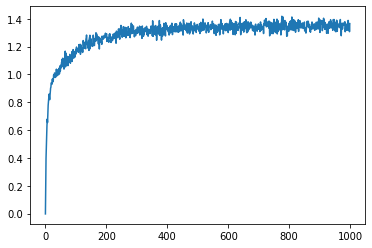

In [33]:
# Simulation parameters for the 10-armed testbed
arms = 10
steps = 1000
runs = 2000
epsilon = 0.1

rewards = np.zeros((runs, steps))

for run in range(runs):

    print(f"Run n° {1 + run}", end="\r")

    armed_bandit = ArmedBandit(arms)
    estimated_rewards = np.zeros(arms)
    times_pulled = np.zeros(arms)

    for step in range(steps):
        if np.random.uniform() < epsilon:
            # Explore
            arm = np.random.randint(arms)
        else:
            # Greedily select maximum reward action
            arm = np.argmax(estimated_rewards)
        reward = armed_bandit.pull(arm)
        times_pulled[arm] += 1
        # Online update of the mean reward for this acton
        estimated_rewards[arm] += (reward - estimated_rewards[arm]) / times_pulled[arm]
        rewards[run][step] = reward

plt.plot(np.mean(rewards, axis=0))

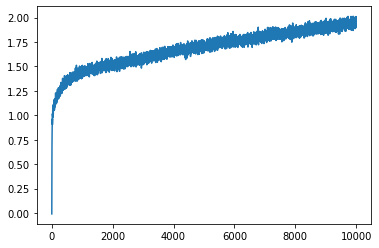

In [36]:
# Simulation parameters for the 10-armed testbed (non-stationary)
# As seen on the graph below, the policy is actually following the trend
arms = 10
steps = 10000
runs = 2000
epsilon = 0.1
alpha = 0.1

rewards = np.zeros((runs, steps))

for run in range(runs):

    print(f"Run n° {1 + run}", end="\r")

    armed_bandit = NonStationaryArmedBandit(arms)
    estimated_rewards = np.zeros(arms)

    for step in range(steps):
        if np.random.uniform() < epsilon:
            # Explore
            arm = np.random.randint(arms)
        else:
            # Greedily select maximum reward action
            arm = np.argmax(estimated_rewards)
        reward = armed_bandit.pull(arm)
        # Online update of the value for this acton
        estimated_rewards[arm] += (reward - estimated_rewards[arm]) * alpha
        rewards[run][step] = reward

plt.plot(np.mean(rewards, axis=0))

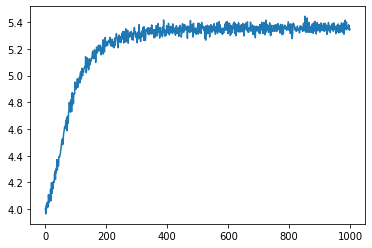

In [52]:
# Simulation parameters for the 10-armed testbed with gradient policy and baseline
arms = 10
steps = 1000
runs = 2000
epsilon = 0.1
alpha = 0.1

rewards = np.zeros((runs, steps))

for run in range(runs):

    print(f"Run n° {1 + run}", end="\r")

    armed_bandit = ArmedBandit(arms, baseline=4.0)
    preferences = np.zeros(arms)
    average_reward = 0

    for step in range(steps):
        probabilities = np.exp(preferences) / np.sum(np.exp(preferences))
        if np.random.uniform() < epsilon:
            # Explore
            arm = np.random.randint(arms)
        else:
            # Select action according to preference
            arm = np.random.choice(arms, p=probabilities)
        reward = armed_bandit.pull(arm)
        # Online update of the average reward
        average_reward += (reward - average_reward) / (1 + step)
        # online update of the preferences
        preferences[arm] += (reward - average_reward) * alpha
        preferences -= (reward - average_reward) * alpha * probabilities
        rewards[run][step] = reward

plt.plot(np.mean(rewards, axis=0))